In [411]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore , ttest_ind
import seaborn as sns
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Sampling

### loading data 

In [412]:
data = pd.ExcelFile('DataSetVentes.xlsx')

all_data = {sheet: data.parse(sheet) for sheet in data.sheet_names}

pants_data = all_data['Pants sales']
dress_data = all_data['Dress sales.']
sweaters_data = all_data['Sweater sales']

In [413]:
pants_data.head()

,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
0,2016-05-01,2.23,3.84,1.48,1.12,1.19
1,2016-06-01,2.14,3.85,1.44,1.09,1.16
2,2016-07-01,1.72,3.30,1.19,0.97,1.03
3,2016-08-01,1.46,2.81,1.00,0.87,0.93
4,2016-09-01,1.86,3.05,1.17,1.02,1.07


In [414]:
dress_data.head()

,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
0,2016-05-01,5.29,11.38,3.03,1.21,1.98
1,2016-06-01,5.66,12.45,3.21,1.24,2.06
2,2016-07-01,4.87,11.70,2.89,1.18,1.88
3,2016-08-01,3.66,8.41,2.06,0.97,1.59
4,2016-09-01,3.35,7.24,1.87,0.92,1.51


In [415]:
sweaters_data.head()

,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
0,2016-05-01,0.63,1.11,3.66,4.71,5.87
1,2016-06-01,0.46,0.82,2.72,3.91,4.97
2,2016-07-01,0.42,0.81,2.70,3.55,4.69
3,2016-08-01,0.91,1.86,6.60,5.33,7.20
4,2016-09-01,1.90,3.78,12.69,8.13,10.92


### Simple sampling 

In [416]:
sample_fraction = 0.3
pants_sample = pants_data.sample(frac=sample_fraction, random_state=42)
dress_sample = dress_data.sample(frac=sample_fraction, random_state=42)
sweaters_sample = sweaters_data.sample(frac=sample_fraction, random_state=42)

In [417]:
pants_sample.head()

,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
35,2019-04-01,3.12,5.45,1.95,1.04,1.45
13,2017-06-01,2.78,6.62,1.92,1.18,1.35
26,2018-07-01,2.72,5.72,1.83,1.01,1.34
30,2018-11-01,5.26,7.63,3.00,1.37,1.97
16,2017-09-01,2.34,4.62,1.49,1.07,1.23


In [418]:
dress_sample.head()

,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
17,2017-10-01,2.62,7.18,1.64,0.75,1.31
13,2017-06-01,6.85,19.10,4.01,1.31,2.31
4,2016-09-01,3.35,7.24,1.87,0.92,1.51
29,2018-09-01,3.64,7.22,1.78,0.75,1.58
35,2019-03-01,5.21,10.70,2.90,0.88,1.96


In [419]:
sweaters_sample.head()

,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
35,2019-04-01,1.15,2.24,6.75,5.34,8.21
13,2017-06-01,0.55,1.18,3.32,4.12,5.43
26,2018-07-01,0.63,1.19,3.91,3.87,5.85
30,2018-11-01,3.89,5.51,19.26,9.33,16.55
16,2017-09-01,2.21,5.02,15.47,8.40,11.88


# Duplicate Handling

In [420]:
duplicates_pants = pants_sample[pants_sample.duplicated()]
print("Duplicated rows in Pants sales data:")
print(duplicates_pants)

Duplicated rows in Pants sales data:
Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


In [421]:
duplicates_dress = dress_sample[dress_sample.duplicated()]
print("Duplicated rows in Dress sales data:")
print(duplicates_dress)

Duplicated rows in Dress sales data:
Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


In [422]:
duplicates_sweaters = sweaters_sample[sweaters_sample.duplicated()]
print("Duplicated rows in Sweater sales data:")
print(duplicates_sweaters)

Duplicated rows in Sweater sales data:
Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


In [423]:
duplicateless_pants = pants_sample.drop_duplicates()
duplicateless_dress = dress_sample.drop_duplicates()
duplicateless_sweaters = sweaters_sample.drop_duplicates()

# Missing Values Handling

In [424]:
missing_values_count_pants = duplicateless_pants.isnull().sum()
print("Missing values in Pants sales data:")
print(missing_values_count_pants)

Missing values in Pants sales data:
Date                0
S/ billion Yuan     0
X4/ billion         0
X8/ 10\nmillion     0
X9/ 100 thousand    0
X10/ million        0
dtype: int64


In [425]:
missing_values_count_dress = duplicateless_dress.isnull().sum()
print("Missing values in Dress sales data:")
print(missing_values_count_dress)

Missing values in Dress sales data:
Date                0
S/ billion Yuan     0
X4/ billion         0
X8/ 10\nmillion     0
X9/ 100 thousand    0
X10/ million        0
dtype: int64


In [426]:
missing_values_count_sweaters = duplicateless_sweaters.isnull().sum()
print("Missing values in Sweater sales data:")
print(missing_values_count_sweaters)

Missing values in Sweater sales data:
Date                0
S/ billion Yuan     0
X4/ billion         0
X8/ 10\nmillion     0
X9/ 100 thousand    0
X10/ million        0
dtype: int64


In [427]:
pants_data_sans_nulles = duplicateless_pants.copy()
dress_data_sans_nulles = duplicateless_dress.copy()
sweaters_data_sans_nulles = duplicateless_sweaters.copy()

In [428]:
numeric_columns = ['S/ billion Yuan', 'X4/ billion', 'X8/ 10\nmillion', 'X9/ 100 thousand', 'X10/ million']
for col in numeric_columns:
    if col in pants_data_sans_nulles.columns:
        pants_data_sans_nulles[col] = duplicateless_pants[col].fillna(duplicateless_pants[col].mean())
    if col in dress_data_sans_nulles.columns:
        dress_data_sans_nulles[col] = duplicateless_dress[col].fillna(duplicateless_dress[col].mean())
    if col in sweaters_data_sans_nulles.columns:
        sweaters_data_sans_nulles[col] = duplicateless_sweaters[col].fillna(duplicateless_sweaters[col].mean())

In [429]:
pants_data_sans_nulles.head()

,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
35,2019-04-01,3.12,5.45,1.95,1.04,1.45
13,2017-06-01,2.78,6.62,1.92,1.18,1.35
26,2018-07-01,2.72,5.72,1.83,1.01,1.34
30,2018-11-01,5.26,7.63,3.00,1.37,1.97
16,2017-09-01,2.34,4.62,1.49,1.07,1.23


In [430]:
dress_data_sans_nulles.head()

,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
17,2017-10-01,2.62,7.18,1.64,0.75,1.31
13,2017-06-01,6.85,19.10,4.01,1.31,2.31
4,2016-09-01,3.35,7.24,1.87,0.92,1.51
29,2018-09-01,3.64,7.22,1.78,0.75,1.58
35,2019-03-01,5.21,10.70,2.90,0.88,1.96


In [431]:
sweaters_data_sans_nulles.head()

,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
35,2019-04-01,1.15,2.24,6.75,5.34,8.21
13,2017-06-01,0.55,1.18,3.32,4.12,5.43
26,2018-07-01,0.63,1.19,3.91,3.87,5.85
30,2018-11-01,3.89,5.51,19.26,9.33,16.55
16,2017-09-01,2.21,5.02,15.47,8.40,11.88


In [432]:
print(pants_data_sans_nulles['S/ billion Yuan'].mean())
print(dress_data_sans_nulles['S/ billion Yuan'].mean())
print(sweaters_data_sans_nulles['S/ billion Yuan'].mean())

2.8454545454545452
4.488181818181818
1.629090909090909


# Outilers Detection 

### PlotBox

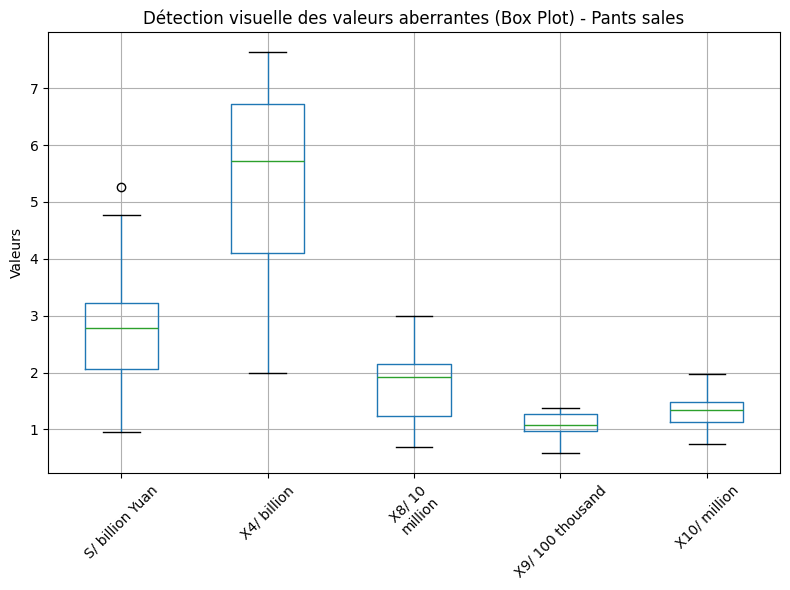

In [433]:
plt.figure(figsize=(8, 6))
pants_data_sans_nulles[numeric_columns].boxplot()
plt.title('Détection visuelle des valeurs aberrantes (Box Plot) - Pants sales')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

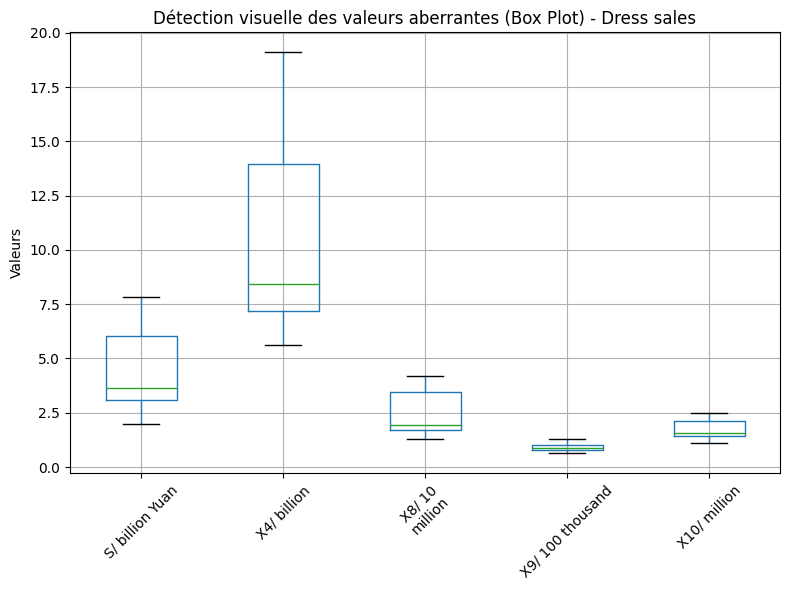

In [434]:
plt.figure(figsize=(8, 6))
dress_data_sans_nulles[numeric_columns].boxplot()
plt.title('Détection visuelle des valeurs aberrantes (Box Plot) - Dress sales')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

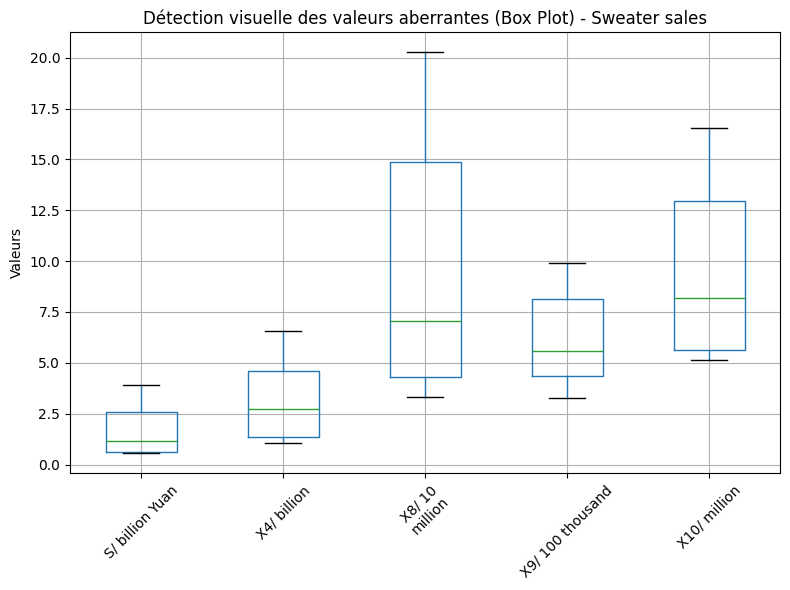

In [435]:
plt.figure(figsize=(8, 6))
sweaters_data_sans_nulles[numeric_columns].boxplot()
plt.title('Détection visuelle des valeurs aberrantes (Box Plot) - Sweater sales')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Z-Score

In [436]:
z_scores_pants = pants_data_sans_nulles[numeric_columns].apply(zscore)
z_scores_dress = dress_data_sans_nulles[numeric_columns].apply(zscore)
z_scores_sweaters = sweaters_data_sans_nulles[numeric_columns].apply(zscore)

In [437]:
outliers_pants = (z_scores_pants.abs() > 2.7).sum()
outliers_dress = (z_scores_dress.abs() > 2.7).sum()
outliers_sweaters = (z_scores_sweaters.abs() > 2.7).sum()

In [438]:
print("Nombre de valeurs aberrantes détectées dans chaque colonne pour Pants sales:")
print(outliers_pants)
print("Nombre de valeurs aberrantes détectées dans chaque colonne pour Dress sales:")
print(outliers_dress)
print("Nombre de valeurs aberrantes détectées dans chaque colonne pour Sweater sales:")
print(outliers_sweaters)

Nombre de valeurs aberrantes détectées dans chaque colonne pour Pants sales:
S/ billion Yuan     0
X4/ billion         0
X8/ 10\nmillion     0
X9/ 100 thousand    0
X10/ million        0
dtype: int64
Nombre de valeurs aberrantes détectées dans chaque colonne pour Dress sales:
S/ billion Yuan     0
X4/ billion         0
X8/ 10\nmillion     0
X9/ 100 thousand    0
X10/ million        0
dtype: int64
Nombre de valeurs aberrantes détectées dans chaque colonne pour Sweater sales:
S/ billion Yuan     0
X4/ billion         0
X8/ 10\nmillion     0
X9/ 100 thousand    0
X10/ million        0
dtype: int64


# Standrization 

In [439]:


standardized_pants = pants_data_sans_nulles.copy()
standardized_dress = dress_data_sans_nulles.copy()
standardized_sweaters = sweaters_data_sans_nulles.copy()

scaler = StandardScaler()

for col in numeric_columns:
    if col in standardized_pants.columns:
        standardized_pants[col] = scaler.fit_transform(standardized_pants[[col]])
    if col in standardized_dress.columns:
        standardized_dress[col] = scaler.fit_transform(standardized_dress[[col]])
    if col in standardized_sweaters.columns:
        standardized_sweaters[col] = scaler.fit_transform(standardized_sweaters[[col]])


In [440]:
print("Standardized Pants sales data:")
standardized_pants.head()

Standardized Pants sales data:


,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
35,2019-04-01,0.222600,0.039480,0.232026,-0.166113,0.307854
13,2017-06-01,-0.053070,0.726105,0.187509,0.442968,0.020871
26,2018-07-01,-0.101718,0.197932,0.053959,-0.296630,-0.007827
30,2018-11-01,1.957702,1.318834,1.790104,1.269578,1.800162
16,2017-09-01,-0.409820,-0.447614,-0.450561,-0.035596,-0.323507


In [441]:
print("Standardized Dress sales data:")
standardized_dress.head()

Standardized Dress sales data:


,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
17,2017-10-01,-0.990887,-0.739726,-0.884795,-0.854282,-1.011270
13,2017-06-01,1.252712,1.833030,1.367803,2.187554,1.245113
4,2016-09-01,-0.603693,-0.726776,-0.666188,0.069133,-0.559993
29,2018-09-01,-0.449877,-0.731093,-0.751730,-0.854282,-0.402046
35,2019-03-01,0.382854,0.020014,0.312789,-0.148141,0.455379


In [442]:
print("Standardized Sweater sales data:")
standardized_sweaters.head()

Standardized Sweater sales data:


,Date,S/ billion Yuan,X4/ billion,X8/ 10\nmillion,X9/ 100 thousand,X10/ million
35,2019-04-01,-0.427303,-0.470679,-0.482740,-0.394265,-0.299196
13,2017-06-01,-0.962446,-1.044749,-1.045240,-0.947142,-1.011766
26,2018-07-01,-0.891094,-1.039333,-0.948483,-1.060436,-0.904111
30,2018-11-01,2.016515,1.300275,1.568829,1.413915,1.838515
16,2017-09-01,0.518115,1.034902,0.947291,0.992460,0.641499


# Relation between Sales and other features 

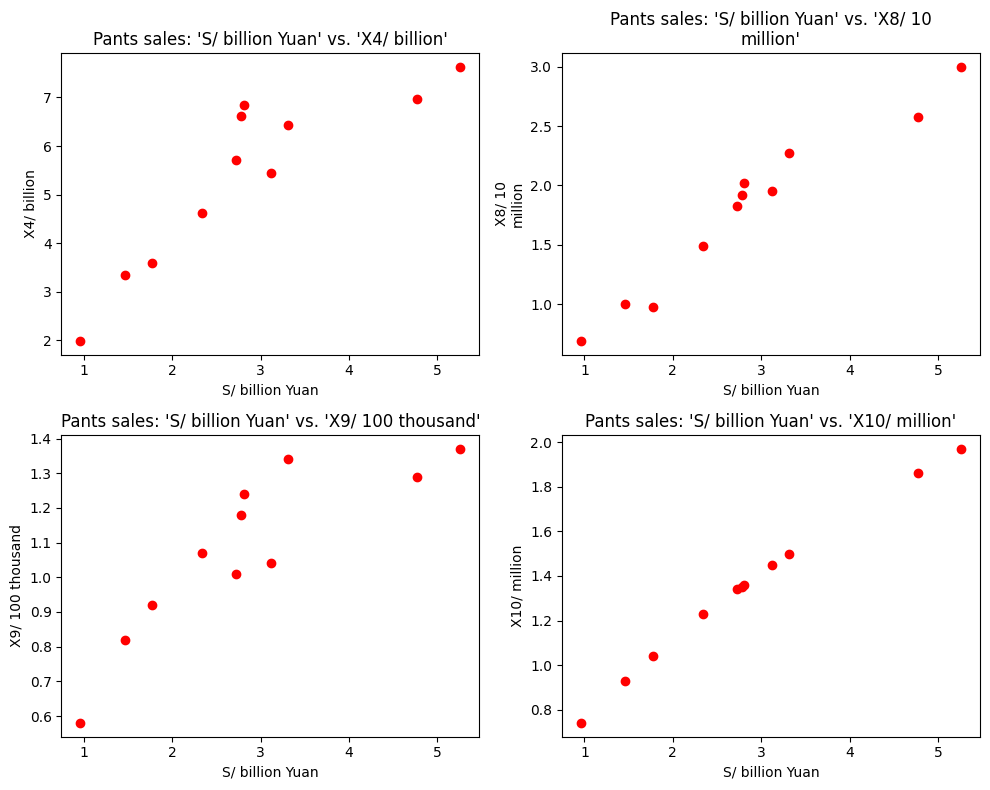

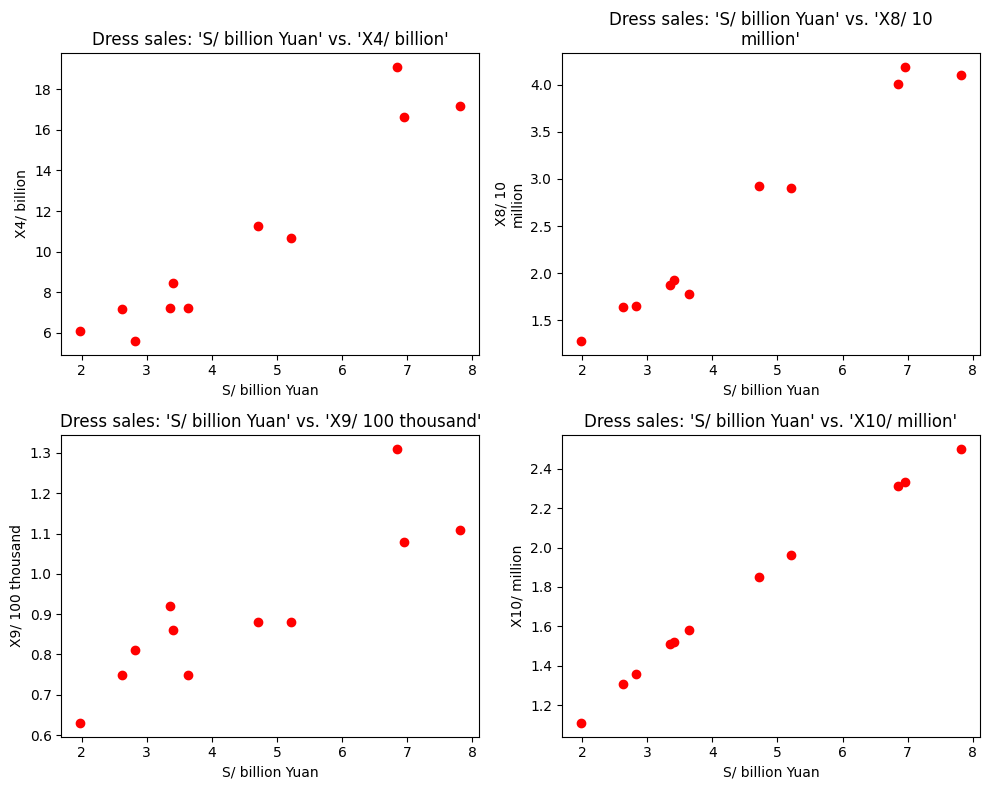

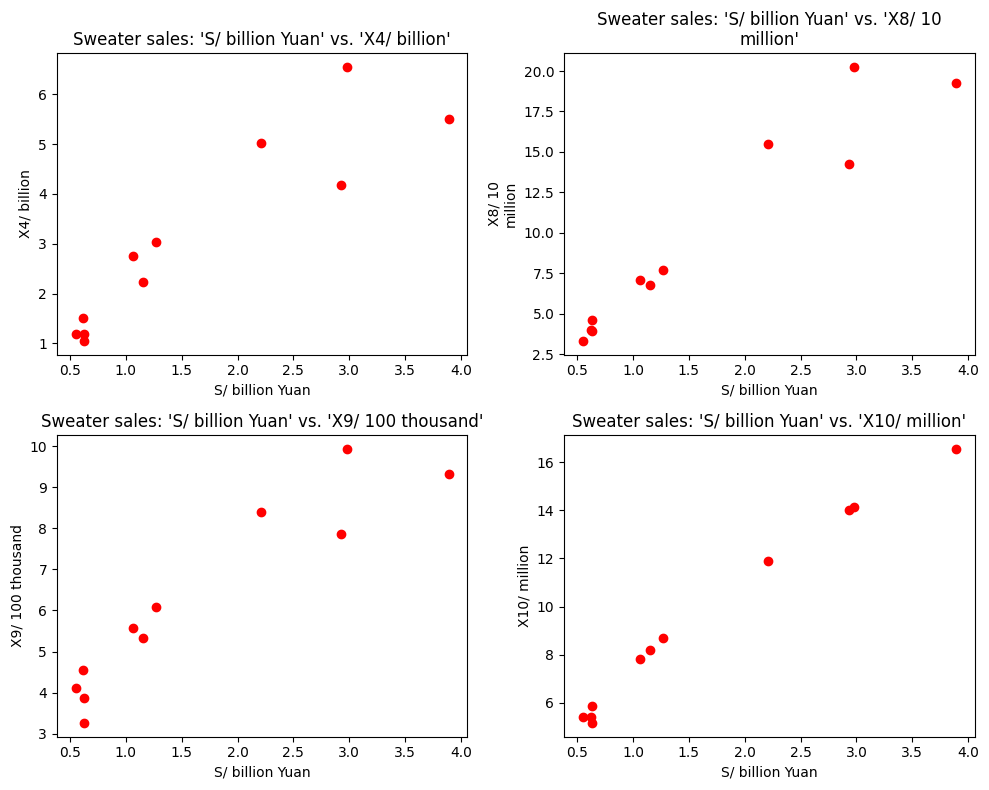

In [443]:
for dataframe, label in [
    (pants_data_sans_nulles, "Pants sales"),
    (dress_data_sans_nulles, "Dress sales"),
    (sweaters_data_sans_nulles, "Sweater sales")
]:
    cols_to_plot = [col for col in numeric_columns if col != 'S/ billion Yuan']
    plt.figure(figsize=(10, 8))
    for i, col in enumerate(cols_to_plot, start=1):
        plt.subplot(2, 2, i)
        plt.scatter(dataframe['S/ billion Yuan'], dataframe[col],c='red')
        plt.xlabel('S/ billion Yuan')
        plt.ylabel(col)
        plt.title(f"{label}: 'S/ billion Yuan' vs. '{col}'")
    plt.tight_layout()
    plt.show()

# Correlation Heatmap Matrix

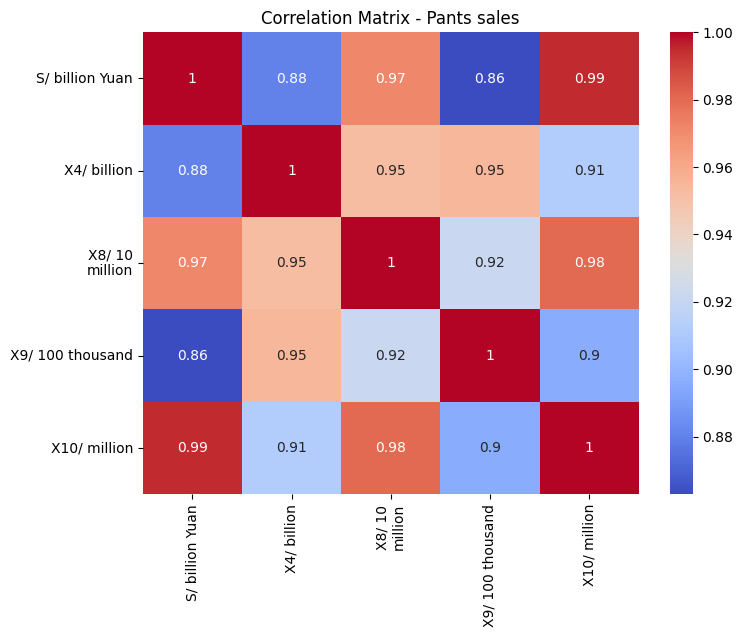

In [444]:
correlation_matrix_pants = standardized_pants[numeric_columns].corr()
correlation_matrix_dress = standardized_dress[numeric_columns].corr()
correlation_matrix_sweaters = standardized_sweaters[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pants, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Pants sales')
plt.show()

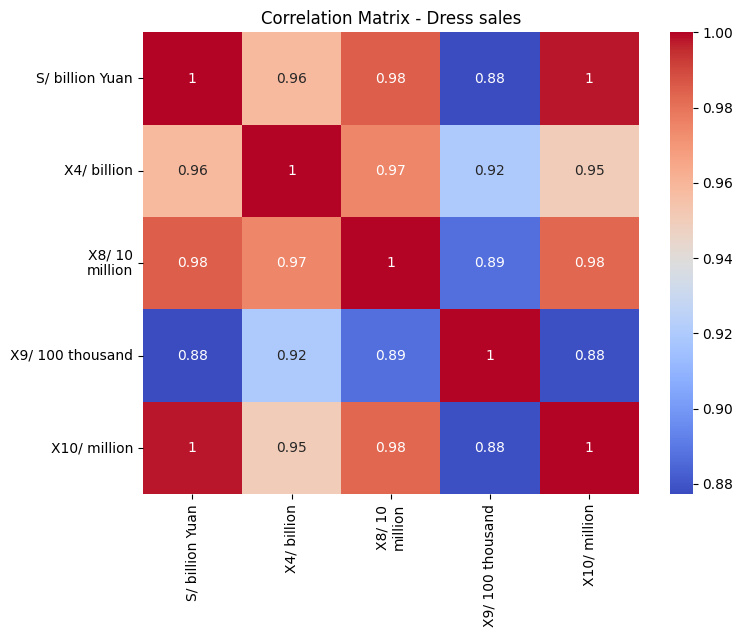

In [445]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_dress, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Dress sales')
plt.show()


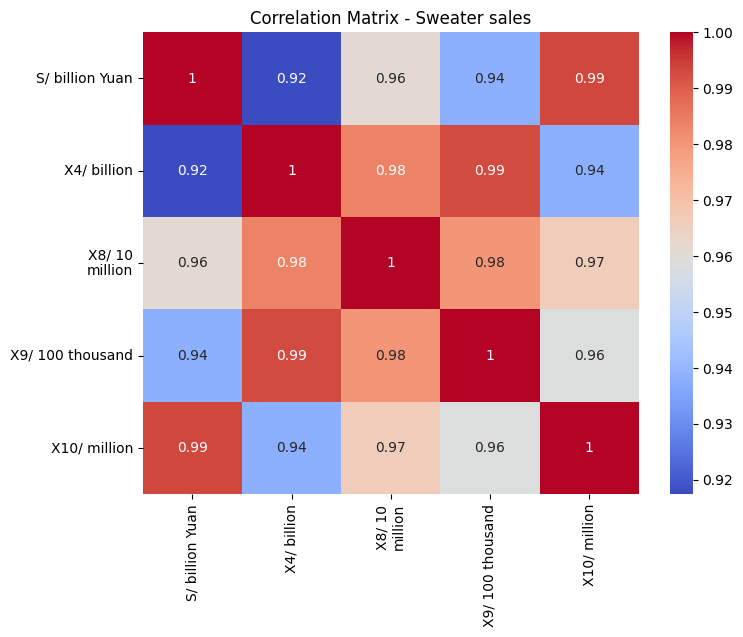

In [446]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_sweaters, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Sweater sales')
plt.show()


# Hypothesis Testing

In [461]:
categories = ['Pants sales', 'Dress sales', 'Sweater sales']
datasets = {
    'Pants sales': pants_data_sans_nulles,
    'Dress sales': dress_data_sans_nulles,
    'Sweater sales': sweaters_data_sans_nulles
}
sales_column = 'S/ billion Yuan'

# Perform pairwise T-tests
for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        category1, category2 = categories[i], categories[j]
        data1 = datasets[category1][sales_column]
        data2 = datasets[category2][sales_column]
        
        # Apply the T-test
        t_stat, p_value = ttest_ind(data1, data2, equal_var=True)
        
        # Display the results
        print(f"T-test between {category1} and {category2}:")
        print(f"t_stat = {t_stat:.4f}, p_value = {p_value:.4f}")
        
        # Check the significance threshold
        if p_value <= 0.05:
            print(f"-> The means are significantly different (p <= 0.05).\n")
        else:
            print(f"-> The means are not significantly different (p > 0.05).\n")


T-test between Pants sales and Dress sales:
t_stat = -2.3058, p_value = 0.0320
-> The means are significantly different (p <= 0.05).

T-test between Pants sales and Sweater sales:
t_stat = 2.3077, p_value = 0.0318
-> The means are significantly different (p <= 0.05).

T-test between Dress sales and Sweater sales:
t_stat = 4.1217, p_value = 0.0005
-> The means are significantly different (p <= 0.05).



# applying PCA

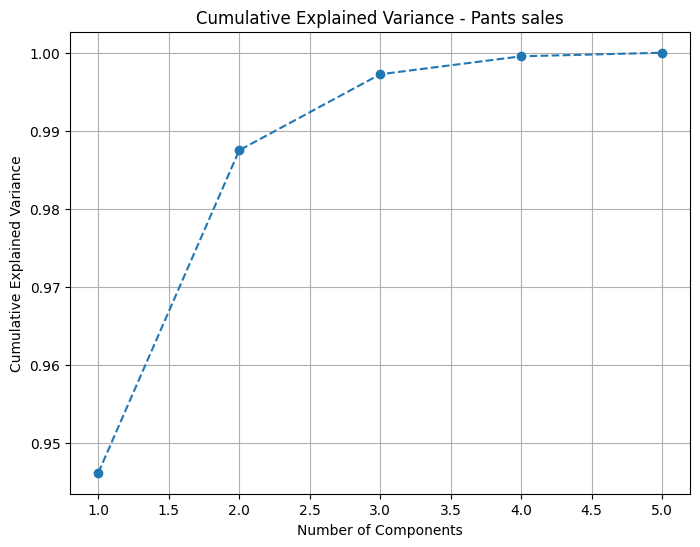

Pants sales - Explained Variance Ratio:
[9.46228829e-01 4.12834377e-02 9.72656625e-03 2.30109849e-03
 4.60068664e-04]


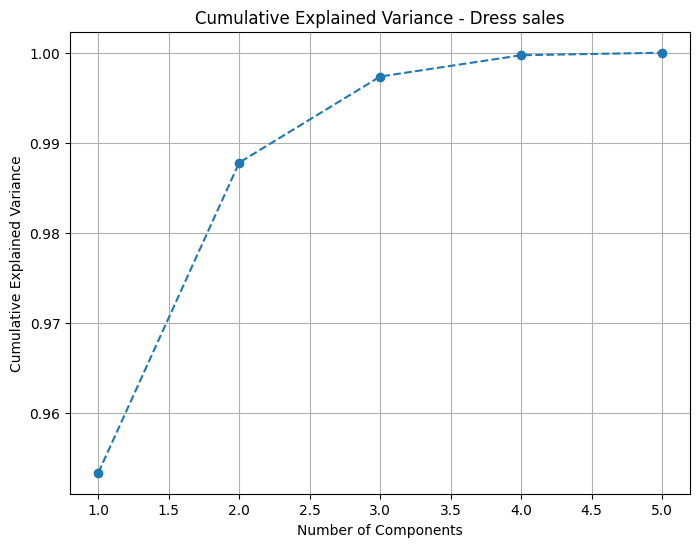

Dress sales - Explained Variance Ratio:
[9.53321278e-01 3.44670616e-02 9.56460994e-03 2.36759714e-03
 2.79453226e-04]


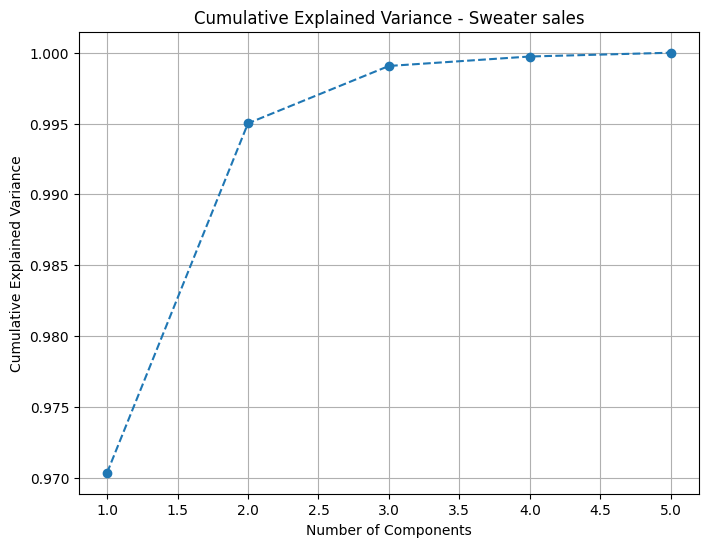

Sweater sales - Explained Variance Ratio:
[9.70349823e-01 2.46660113e-02 4.04947804e-03 6.67653523e-04
 2.67033702e-04]


{'Pants sales': array([9.46228829e-01, 4.12834377e-02, 9.72656625e-03, 2.30109849e-03,
        4.60068664e-04]),
 'Dress sales': array([9.53321278e-01, 3.44670616e-02, 9.56460994e-03, 2.36759714e-03,
        2.79453226e-04]),
 'Sweater sales': array([9.70349823e-01, 2.46660113e-02, 4.04947804e-03, 6.67653523e-04,
        2.67033702e-04])}

In [448]:
# Datasets already standardized (assume standardized_pants, standardized_dress, standardized_sweaters are defined)
datasets = {
    'Pants sales': standardized_pants,
    'Dress sales': standardized_dress,
    'Sweater sales': standardized_sweaters
}

# Columns for PCA
numeric_columns = ['S/ billion Yuan', 'X4/ billion', 'X8/ 10\nmillion', 'X9/ 100 thousand', 'X10/ million']

# Store PCA results
pca_results = {}

# Apply PCA for each dataset separately
for category, data in datasets.items():
    # Select numeric data for PCA
    data_numeric = data[numeric_columns]
    
    # Apply PCA
    pca = PCA()
    pca_transformed = pca.fit_transform(data_numeric)
    explained_variance = pca.explained_variance_ratio_
    
    # Store results
    pca_results[category] = explained_variance
    
    # Plot cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
    plt.title(f'Cumulative Explained Variance - {category}')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid()
    plt.show()
    
    print(f"{category} - Explained Variance Ratio:")
    print(explained_variance)

# Display PCA results for each sheet
pca_results

# Model Construction 

## Linear Regression

### data preparation

In [449]:
# Prepare data for linear regression
datasets_pca = {}  # Store PCA-transformed data and targets
sales_column = 'S/ billion Yuan'  # Target column

# Assume the first two principal components are sufficient based on PCA results
for category, data in datasets.items():
    # Select PCA-transformed data and the sales target
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(data[numeric_columns])  # First 2 components
    target = data[sales_column].values  # Sales target
    
    # Store PCA-transformed data and target
    datasets_pca[category] = (pca_transformed, target)

# Linear regression results storage
regression_results = {}

### Train and evaluate models for each category


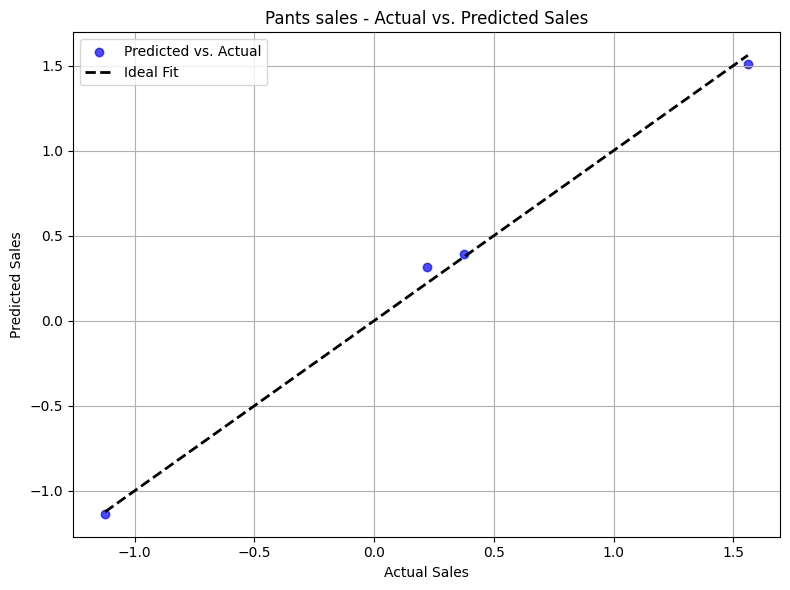

Pants sales Results:
Mean Squared Error (MSE): 0.0029
R-squared (R²): 0.9968


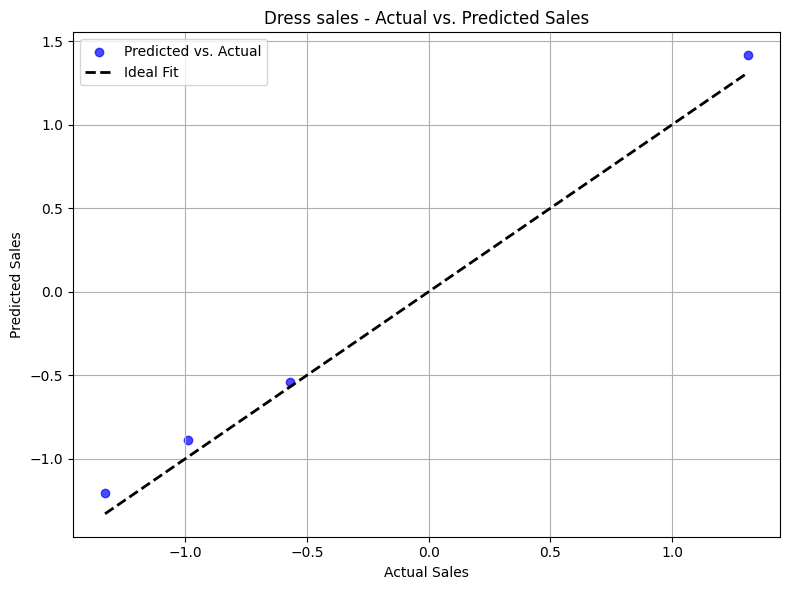

Dress sales Results:
Mean Squared Error (MSE): 0.0095
R-squared (R²): 0.9909


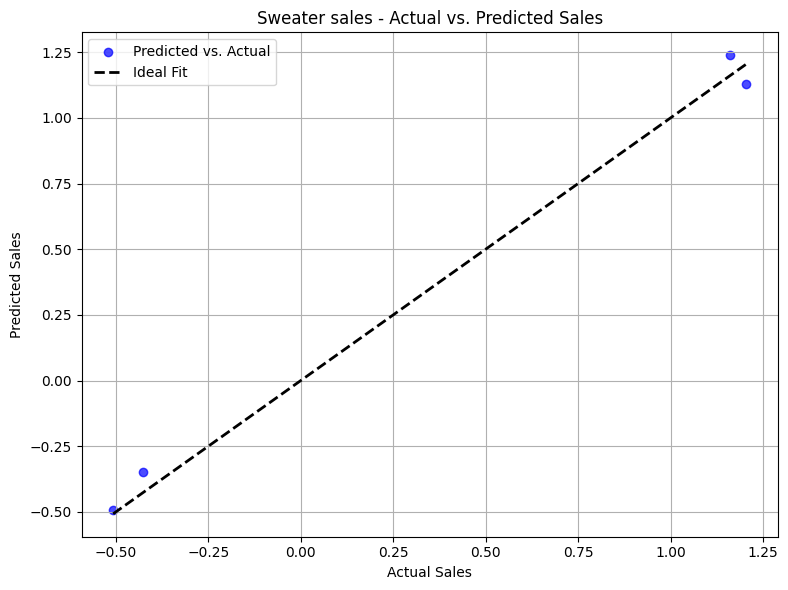

Sweater sales Results:
Mean Squared Error (MSE): 0.0045
R-squared (R²): 0.9934


{'Pants sales': {'model': LinearRegression(),
  'mse': np.float64(0.0028648150856557344),
  'r2': 0.9968341501432,
  'y_test': array([ 1.56041193,  0.2226001 ,  0.37665116, -1.12331969]),
  'y_pred': array([ 1.50685997,  0.31351679,  0.39050575, -1.13488049])},
 'Dress sales': {'model': LinearRegression(),
  'mse': np.float64(0.009494064910521148),
  'r2': 0.9908970406859136,
  'y_test': array([ 1.31105634, -0.99088664, -0.57186937, -1.33034367]),
  'y_pred': array([ 1.41534653, -0.88785163, -0.54371892, -1.20507933])},
 'Sweater sales': {'model': LinearRegression(),
  'mse': np.float64(0.004476399220956602),
  'r2': 0.9934334600944229,
  'y_test': array([ 1.16028671, -0.42730335,  1.20488194, -0.50757476]),
  'y_pred': array([ 1.23851656, -0.34974916,  1.13047319, -0.4922655 ])}}

In [450]:
for category, (X, y) in datasets_pca.items():
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    regression_results[category] = {
        'model': model,
        'mse': mse,
        'r2': r2,
        'y_test': y_test,
        'y_pred': y_pred
    }
    
    # Visualize results
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs. Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
    plt.title(f'{category} - Actual vs. Predicted Sales')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    print(f"{category} Results:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")

# Display overall regression results
regression_results


### Evaluate the Model

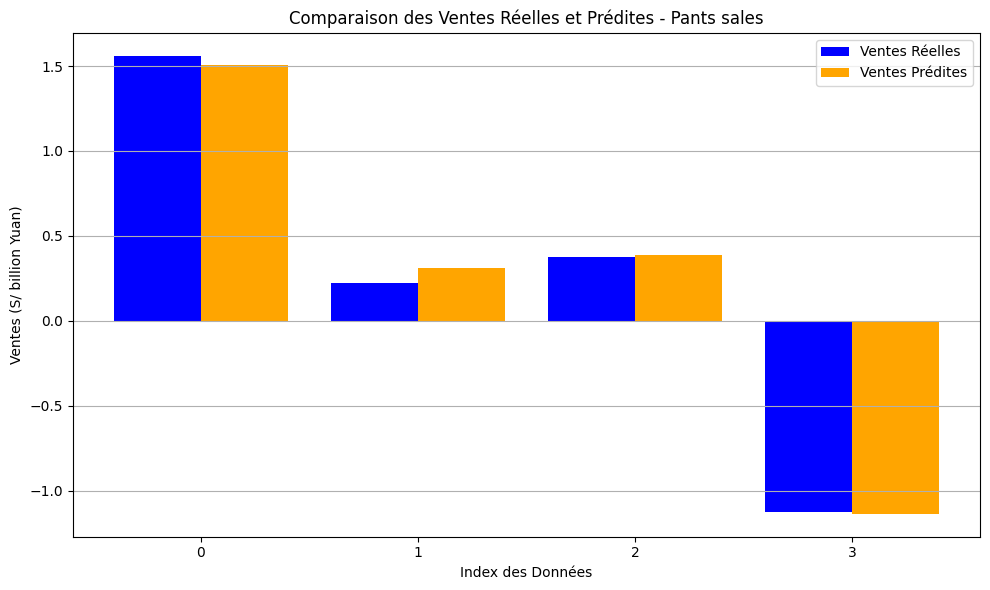

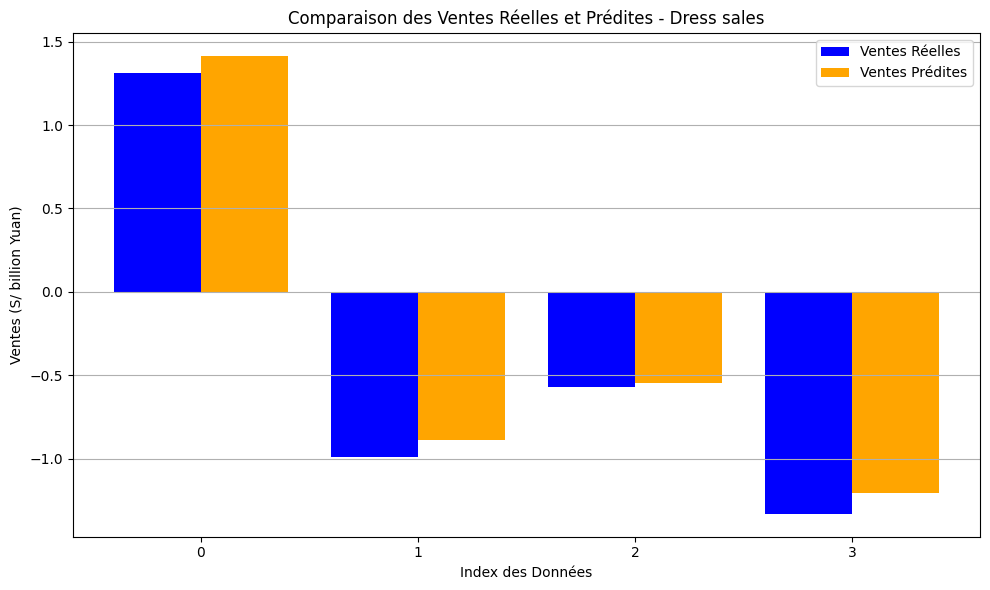

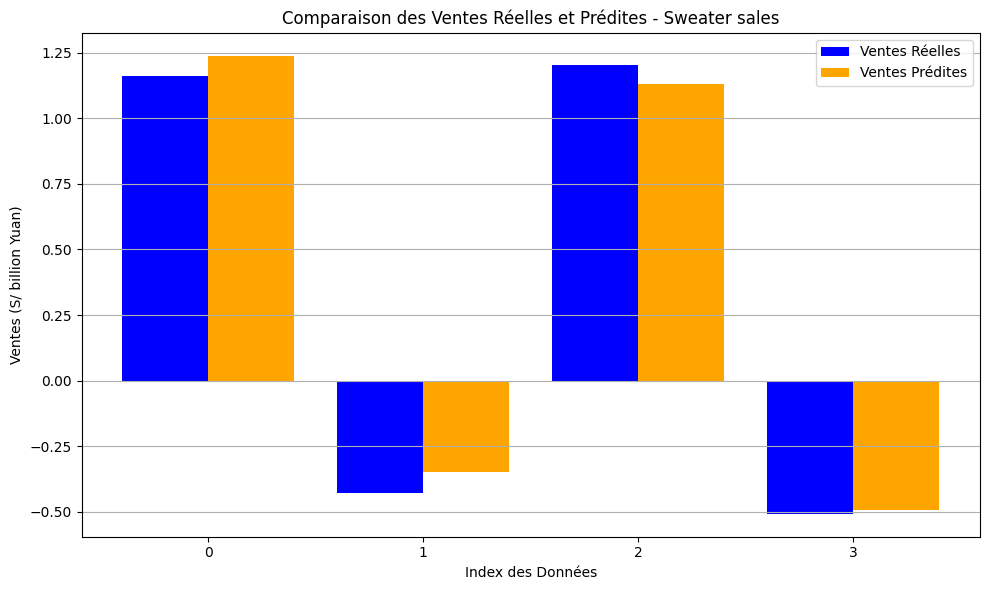

In [451]:
# Data from the results
categories = ['Pants sales', 'Dress sales', 'Sweater sales']
results = {
    'Pants sales': {'y_test': [1.56041193, 0.2226001, 0.37665116, -1.12331969],
                    'y_pred': [1.50685997, 0.31351679, 0.39050575, -1.13488049]},
    'Dress sales': {'y_test': [1.31105634, -0.99088664, -0.57186937, -1.33034367],
                    'y_pred': [1.41534653, -0.88785163, -0.54371892, -1.20507933]},
    'Sweater sales': {'y_test': [1.16028671, -0.42730335, 1.20488194, -0.50757476],
                      'y_pred': [1.23851656, -0.34974916, 1.13047319, -0.4922655]}
}

# Generate bar charts for each category
for category in categories:
    y_test = results[category]['y_test']
    y_pred = results[category]['y_pred']
    indices = np.arange(len(y_test))  # Index for bar positions

    plt.figure(figsize=(10, 6))
    plt.bar(indices - 0.2, y_test, width=0.4, label='Ventes Réelles', color='blue')
    plt.bar(indices + 0.2, y_pred, width=0.4, label='Ventes Prédites', color='orange')
    plt.title(f'Comparaison des Ventes Réelles et Prédites - {category}')
    plt.xlabel('Index des Données')
    plt.ylabel('Ventes (S/ billion Yuan)')
    plt.xticks(indices)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


# Conclusion

The results of the linear regression models demonstrate **excellent predictive capabilities** for the categories of **Pants**, **Dresses**, and **Sweaters**. With **R² values** close to 1 and low **Mean Squared Errors (MSE)**, the models exhibit **high precision**.

## Key Insights

### Pants
- **Performance**: Best among all categories.
- **Metrics**: 
  - **MSE**: 0.0029
  - **R²**: 0.9968
- **Observation**: Predicted values are almost identical to the actual sales.

### Dresses
- **Performance**: Slightly less precise than Pants.
- **Metrics**:
  - **MSE**: 0.0095
  - **R²**: 0.9909
- **Observation**: Effectively follows the overall sales trends.

### Sweaters
- **Performance**: A solid balance of accuracy and reliability.
- **Metrics**:
  - **MSE**: 0.0045
  - **R²**: 0.9934
- **Observation**: Predictions are very close to the actual values.

These results provide valuable insights to drive **business strategies** with confidence.


## Time Series Model

### Create Synthetic Data

In [462]:
# Generate synthetic time series data
dates = pd.date_range(start='2016-04-01', periods=36, freq='ME')  # 36 months
base_data = np.random.uniform(1, 10, size=36)  # Random base data

# Add a linear trend
trend = np.linspace(0, 5, 36)
data_with_trend = base_data + trend

# Add seasonality
seasonality = 2 * np.sin(2 * np.pi * np.arange(36) / 12)  # Annual seasonality
data_with_seasonality = base_data + trend + seasonality

# Create a DataFrame
time_series = pd.DataFrame({'Date': dates, 'Sales': data_with_seasonality})
time_series.set_index('Date', inplace=True)


### Visualize the Synthetic Data

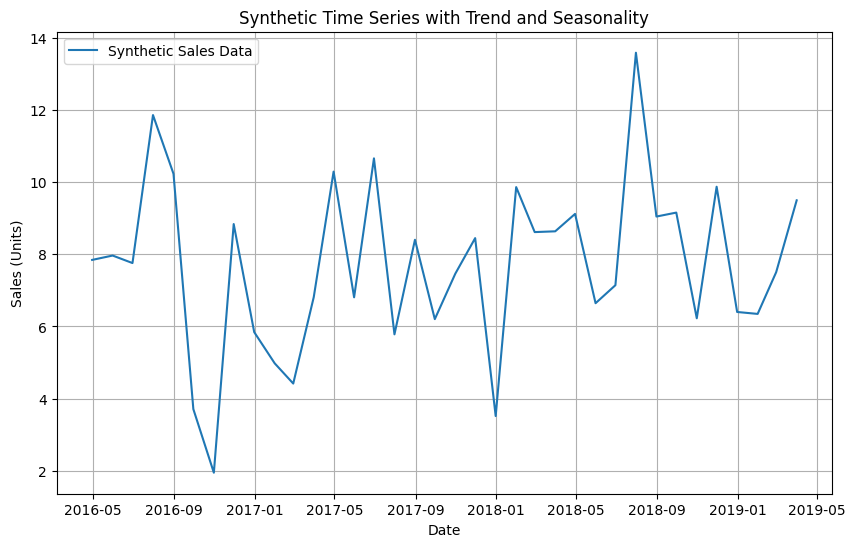

In [453]:
# Plot the time series with trend and seasonality
plt.figure(figsize=(10, 6))
plt.plot(time_series['Sales'], label='Synthetic Sales Data')
plt.title('Synthetic Time Series with Trend and Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales (Units)')
plt.legend()
plt.grid()
plt.show()


### **Description**:
This line plot illustrates a synthetic time series that combines a linear trend and seasonal variations over time.

### **Key Insights**:
- **Seasonality**: The regular ups and downs indicate the presence of a strong seasonal component, which repeats over time.
- **Trend**: A gradual upward trend can be observed, showing an increase in the baseline values over time.
- **Fluctuations**: Sharp peaks and troughs suggest variability in the data that may reflect external factors or random noise.

### Decompose the Time Series

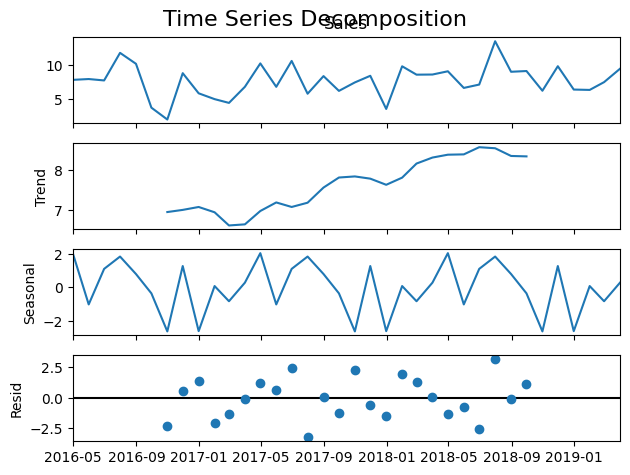

In [454]:
# Decompose the time series
decomposition = seasonal_decompose(time_series['Sales'], model='additive')
trend = decomposition.trend

# Visualize the decomposition components
decomposition.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.show()


### **Description**:
This decomposition plot breaks down the synthetic time series into its components:
1. **Observed**: The original time series.
2. **Trend**: The underlying trend over time.
3. **Seasonal**: The repetitive seasonal pattern.
4. **Residual**: The remaining noise or irregularities.

## **Key Insights**:
- The **trend component** shows a steady increase, supporting the upward movement observed in the overall data.
- The **seasonal component** highlights periodic fluctuations that are consistent over time.
- The **residual component** is centered around zero, suggesting that most patterns in the data are captured by the trend and seasonality.


### Load Real Sales Data

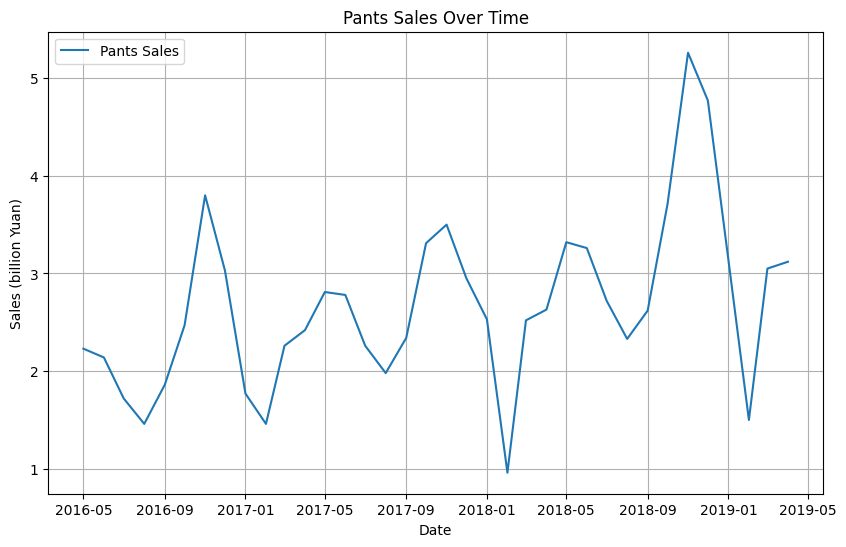

In [455]:
# Assuming `pants_data` is a DataFrame with Date and Sales columns
pants_time_series = pants_data[['Date', 'S/ billion Yuan']].copy()
pants_time_series['Date'] = pd.to_datetime(pants_time_series['Date'])
pants_time_series.set_index('Date', inplace=True)
pants_time_series = pants_time_series.asfreq('MS')  # Set monthly frequency

# Plot real sales data
plt.figure(figsize=(10, 6))
plt.plot(pants_time_series, label='Pants Sales')
plt.title('Pants Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (billion Yuan)')
plt.legend()
plt.grid()
plt.show()


### **Description**:
This plot displays the actual sales of pants (in billion Yuan) over time.

### **Key Insights**:
- **Seasonality**: The sales exhibit a clear seasonal pattern with periodic peaks and troughs.
- **Anomalies**: A significant dip in early 2018 may indicate an external factor or event that affected sales negatively.
- **Peaks**: Late 2016 and late 2018 show sharp increases in sales, possibly tied to specific events like promotions or holidays.


### Split Data into Train and Test Sets

In [456]:
# Split into training and testing sets
train_size = int(len(pants_time_series) * 0.8)
train, test = pants_time_series.iloc[:train_size], pants_time_series.iloc[train_size:]


### Fit Holt-Winters Exponential Smoothing

In [457]:
# Train Holt-Winters model
model = ExponentialSmoothing(
    train['S/ billion Yuan'],
    seasonal='add',  # Additive seasonality
    seasonal_periods=12  # Monthly data
)
fitted_model = model.fit()

# Forecast
forecast_steps = len(test)
forecast = fitted_model.forecast(forecast_steps)


### Evaluate the Model

In [458]:
# Evaluate the model
mse = mean_squared_error(test['S/ billion Yuan'], forecast)
r2 = r2_score(test['S/ billion Yuan'], forecast)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.4606
R-squared (R²): 0.6285


### Visualize Forecast vs. Actual

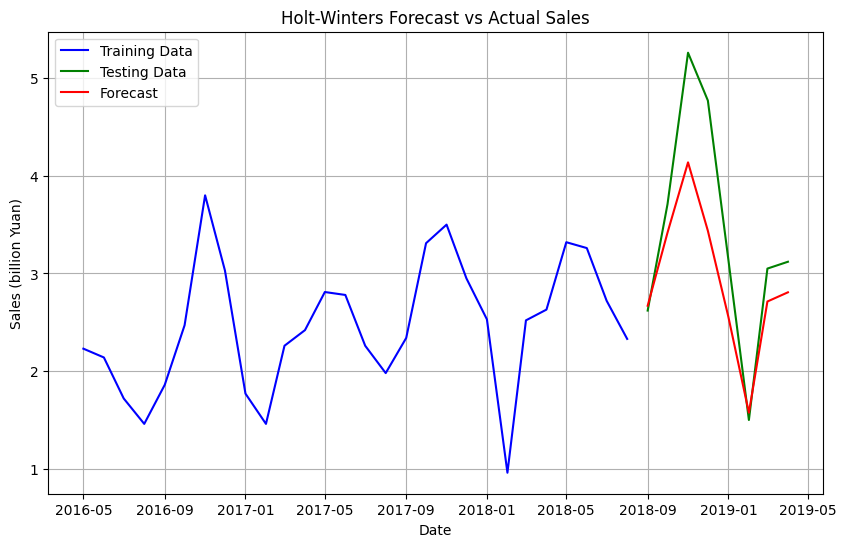

In [459]:
# Plot the forecast against actual sales
plt.figure(figsize=(10, 6))
plt.plot(train['S/ billion Yuan'], label='Training Data', color='blue')
plt.plot(test['S/ billion Yuan'], label='Testing Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Holt-Winters Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales (billion Yuan)')
plt.legend()
plt.grid()
plt.show()


### **Description**:
This plot compares:
- **Training data** (blue).
- **Testing data** (green).
- **Forecasted data** (red) using the Holt-Winters Exponential Smoothing model.

### **Key Insights**:
- The **forecasted data (red)** aligns well with the **testing data (green)**, capturing the overall trend and seasonality.
- **Deviations**: The model struggles with extreme fluctuations, underestimating during the sharp peak in late 2018.
- **Smoothness**: The forecast assumes gradual changes, which may not reflect sudden spikes or dips accurately.


### Residual Analysis

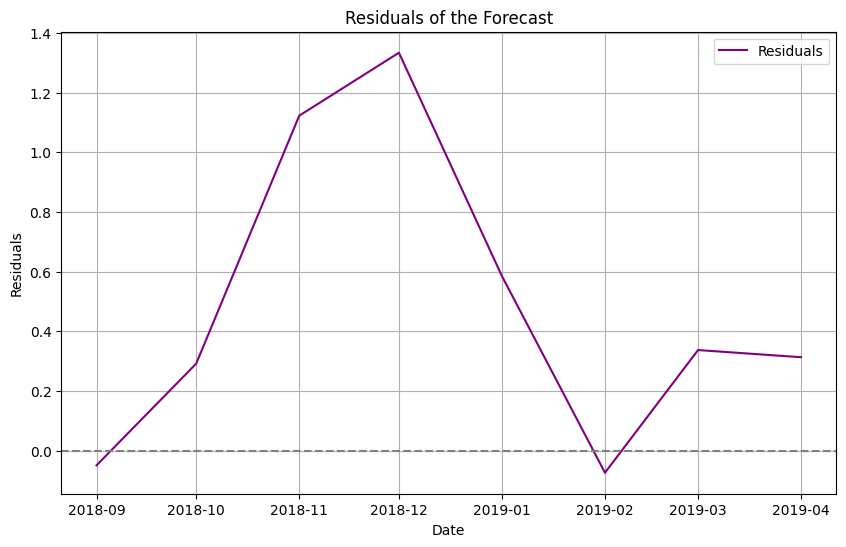

In [460]:
# Analyze residuals
residuals = test['S/ billion Yuan'] - forecast

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Residuals of the Forecast')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()


### **Description**:
This plot shows the residuals (differences between actual and forecasted sales) during the testing period.

### **Key Insights**:
- **Centered around zero**: Residuals are distributed around zero, indicating no significant bias in the model predictions.
- **High residuals**: Late 2018 shows large residuals where the model underestimated actual sales significantly.
- **Stabilization**: Toward the end of the period, residuals stabilize, indicating improved model accuracy after the extreme variations.
